In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

In the article [Test Functions for Optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization), there are few functions for evaluating optimization algorithms like this

1. <b>Beale's Function</b>
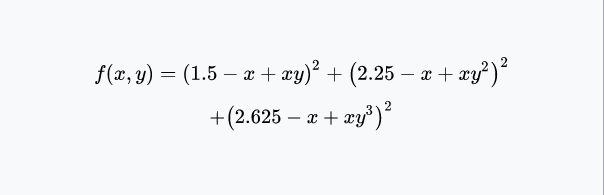
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Beale%27s_function.pdf/page1-300px-Beale%27s_function.pdf.jpg"/>

In [2]:
# We will try out different Test Functions on this, but now Beale's Function
f = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [3]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

In [4]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [5]:
z = f(x, y)

In [6]:
# We know that the global minima is at (3, 0.5)
minima = np.array([3, .5])

In [7]:
f(*minima)

0.0

In [8]:
minima_ = minima.reshape(-1, 1)

minima_

array([[3. ],
       [0.5]])

In [9]:
f(*minima_)

array([0.])

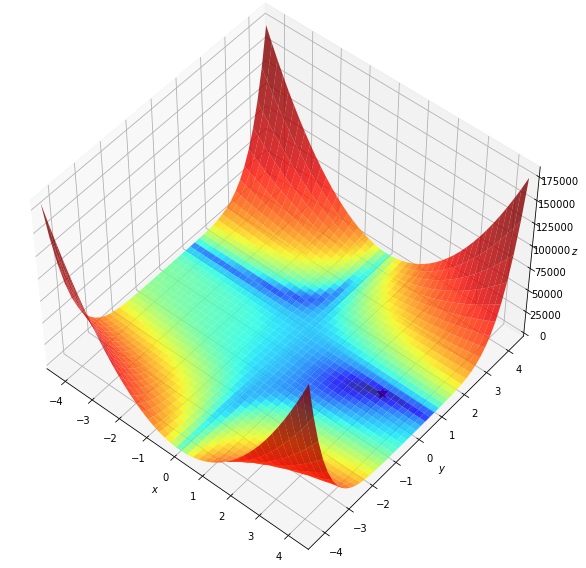

In [11]:
# 3D Surface Plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.show()

### 2D Contour Plot and Gradient Vector Field

In [12]:
# Plot it using quiver() method
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

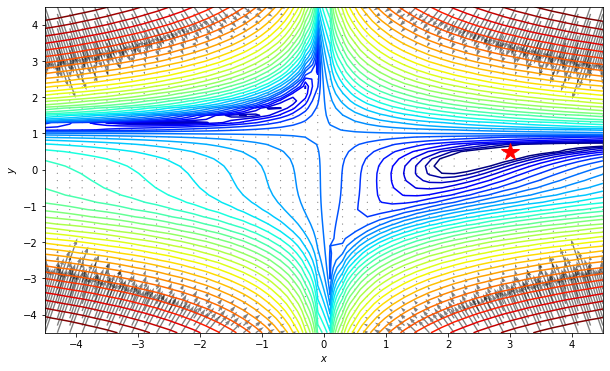

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

### Gradient Based Optimization
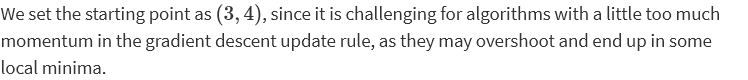

In [15]:
x0 = np.array([3., 4.])

In [16]:
# Use autograd to compute the gradients
func = value_and_grad(lambda args: f(*args))

In [17]:
# Newton-CG method 
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=print)

[2.71113991 3.35161828]
[2.48008912 2.78955116]
[2.29965866 2.30123678]
[2.16373347 1.8756312 ]
[2.06741079 1.50235414]
[2.00766238 1.17079384]
[1.98485905 0.86972447]
[2.00511126 0.59071489]
[2.07692544 0.34891823]
[2.17857778 0.21644485]
[2.55966682 0.38003383]
[2.80228089 0.44954972]
[2.94477854 0.48765376]
[2.94564749 0.48601427]
[2.95359059 0.48810805]
[2.97113926 0.49269804]
[2.99870863 0.49976066]
[2.9999948  0.49999875]
[2.99999996 0.49999999]
[2.99999996 0.49999999]
[2.99999996 0.49999999]
[2.99999996 0.49999999]
[2.99999996 0.49999999]
[2.99999997 0.49999999]
[2.99999997 0.49999999]


In [18]:
dict(res)

{'fun': 1.9427177790054514e-16,
 'jac': array([-1.12394673e-08,  3.50318692e-10]),
 'nfev': 25,
 'njev': 77,
 'nhev': 0,
 'status': 0,
 'success': True,
 'message': 'Optimization terminated successfully.',
 'x': array([2.99999997, 0.49999999]),
 'nit': 25}

 Let us define a new callback function that appends the intermediate values to a list instead of simply printing it.

In [19]:
def make_minimize_cb(path=[]):
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))
    
    return minimize_cb

In [20]:
path_ = [x0]

In [21]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))

In [22]:
dict(res)

{'fun': 1.9427177790054514e-16,
 'jac': array([-1.12394673e-08,  3.50318692e-10]),
 'nfev': 25,
 'njev': 77,
 'nhev': 0,
 'status': 0,
 'success': True,
 'message': 'Optimization terminated successfully.',
 'x': array([2.99999997, 0.49999999]),
 'nit': 25}

In [24]:
path = np.array(path_).T
path.shape

(2, 26)

### Static Quiver Plot of Path on 2D Contour Plot

Here we represent each step, it's length and direction, using the arrows.

(-4.5, 4.5)

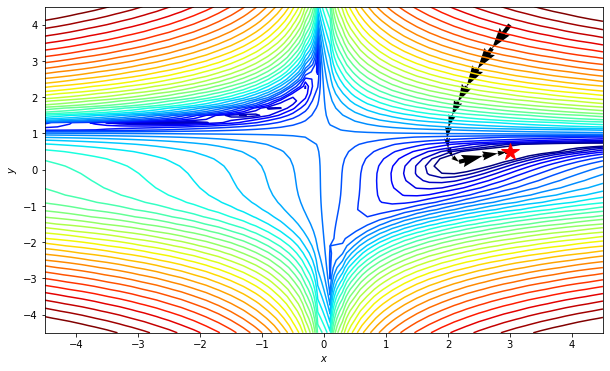

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

### Static Quiver Plot of Path on 3D Surface Plot

(-4.5, 4.5)

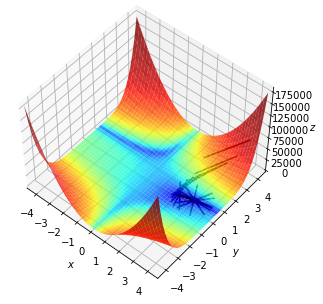

In [27]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], f(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], f(*(path[::,1:]-path[::,:-1])), 
          color='k')
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

### Animated Single Path on 2D Contour Plot

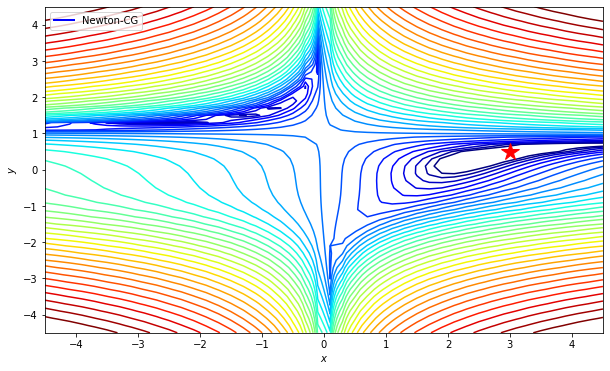

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [29]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

In [30]:
# We define our animation to draw the path up to ith intermediate point on the ith frame.
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

We define the total number of frames to be the total number of steps taken in the optimization and using `blitting` so as to only redraw the parts of the animation that have changed.

In [31]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60,
                               repeat_delay=5, blit=True)

In [32]:
HTML(anim.to_html5_video()) # Animation

## Animating Single Path on 3D Surface Plot

(-4.5, 4.5)

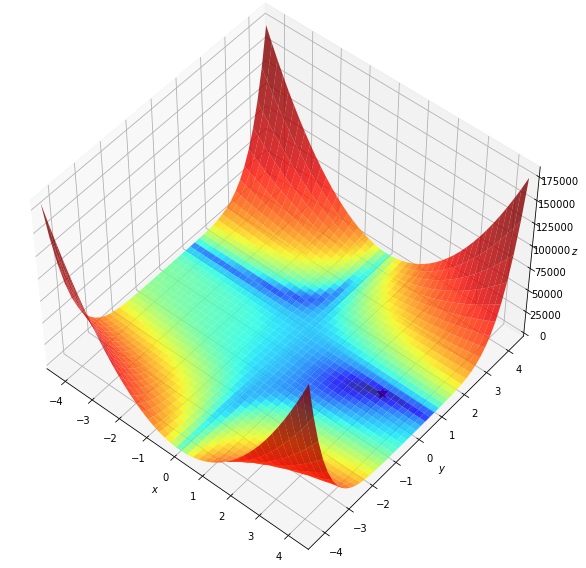

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

line, = ax.plot([], [], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

In [35]:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

In [40]:
def animate(i):
    line.set_data(path[0, :i], path[1, :i])
    line.set_3d_properties(f(*path[::, :i]))
    point.set_data(path[0, i-1:i], path[1, i-1:i])
    point.set_3d_properties(f(*path[::, i-1:i]))
    return line, point

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [38]:
HTML(anim.to_html5_video())

### Modularizing and Generalizing to Animate Multiple Paths 
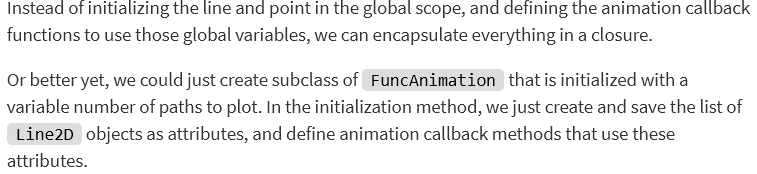

In [42]:
class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

In [44]:
class TrajectoryAnimation3D(animation.FuncAnimation):
    
    def __init__(self, *paths, zpaths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths
        self.zpaths = zpaths
        
        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]

        super(TrajectoryAnimation3D, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line in self.lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return self.lines

    def animate(self, i):
        for line, path, zpath in zip(self.lines, self.paths, self.zpaths):
            line.set_data(*path[::,:i])
            line.set_3d_properties(zpath[:i])
        return self.lines

### Gradient Based Optimization Algorithms

In [45]:
methods = [
    "CG",
    "Newton-CG",
    "L-BFGS-B",
    "TNC",
    "SLSQP",
]

In [46]:
minimize_ = partial(minimize, fun=func, x0=x0, jac=True, bounds=[(xmin, xmax), (ymin, ymax)], tol=1e-20)

In [47]:
# Initialize Trajectories
paths_ = defaultdict(list)
for method in methods:
    paths_[method].append(x0)

In [48]:
# Results
results = {method: minimize_(method=method, callback=make_minimize_cb(paths_[method])) for method in methods}

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\scipy\optimize\_minimize.py:533: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\scipy\optimize\_minimize.py:533: RuntimeWarning: Method Newton-CG cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


In [49]:
paths = [np.array(paths_[method]).T for method in methods]

In [50]:
zpaths = [f(*path) for path in paths]

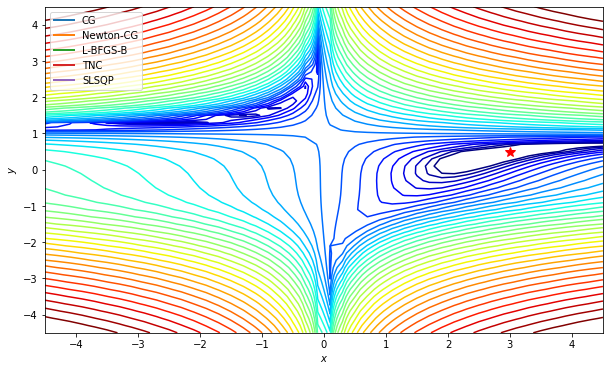

In [51]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths, labels=methods, ax=ax)

ax.legend(loc='upper left')

In [53]:
# HTML Animation
HTML(anim.to_html5_video())

In [ ]:
# 3D Animate
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation3D(*paths, zpaths=zpaths, labels=methods, ax=ax)

ax.legend(loc='upper left')

In [55]:
HTML(anim.to_html5_video())

# Using Other Test Functions

### 1. McCormic Function


Minima


In [56]:
f = lambda x, y: np.sin(x + y) + (x - y)**2 - 1.5*x + 2.5*y + 1

In [57]:
xmin, xmax, xstep = -1.5, 4, .2
ymin, ymax, ystep = -3, 4, .2

In [58]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [59]:
z = f(x, y)

In [60]:
minima = np.array([-0.54719, -1.54719])

In [61]:
f(*minima)

-1.913222954882274

In [62]:
minima_ = minima.reshape(-1, 1)
minima_

array([[-0.54719],
       [-1.54719]])

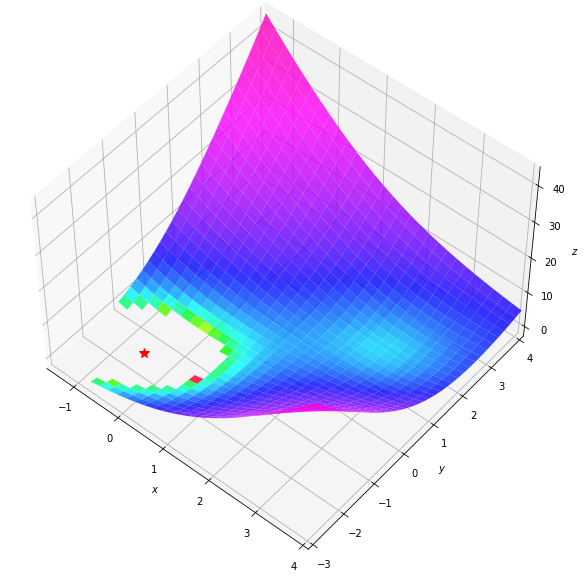

In [67]:
# 3D Surface Plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.gist_rainbow)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

<ipython-input-69-8766a1c58664>:8: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gist_rainbow)


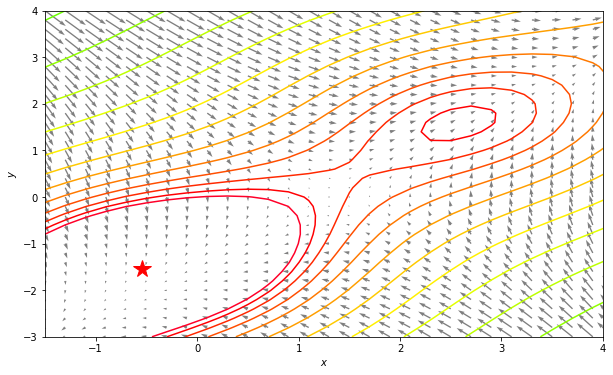

In [69]:
# 2D Contour Plot and Gradient Vector Field
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)


fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gist_rainbow)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

## 2. Himmelblau's Function
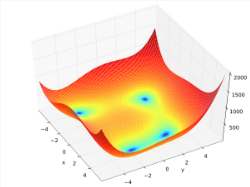
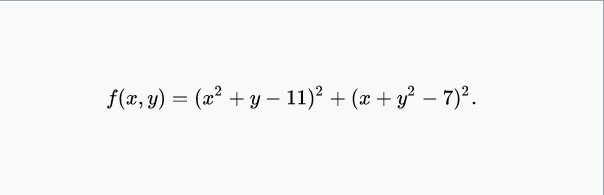
####  Minima
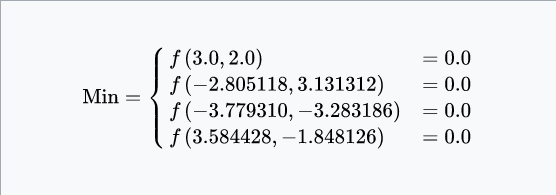

In [73]:
f = lambda x, y: (x**2 + y - 11)**2 + (x + y**2 - 7)**2

In [74]:
xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2

In [75]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [76]:
z = f(x, y)

In [79]:
# Here we can try different values
#minima = np.array([3.0, 2.0])
minima = np.array([-2.805118, 3.131312])

In [80]:
f(*minima)

1.0989296656869089e-11

In [81]:
minima_ = minima.reshape(-1, 1)
minima_

array([[-2.805118],
       [ 3.131312]])

In [82]:
f(*minima_)

array([1.09892967e-11])

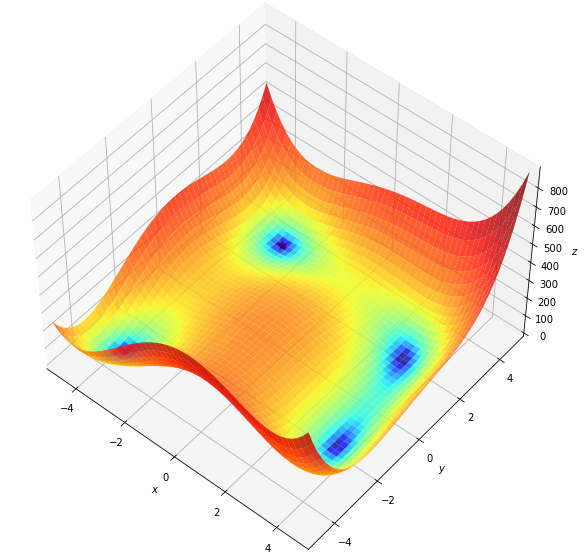

In [85]:
# 3D Surface Plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

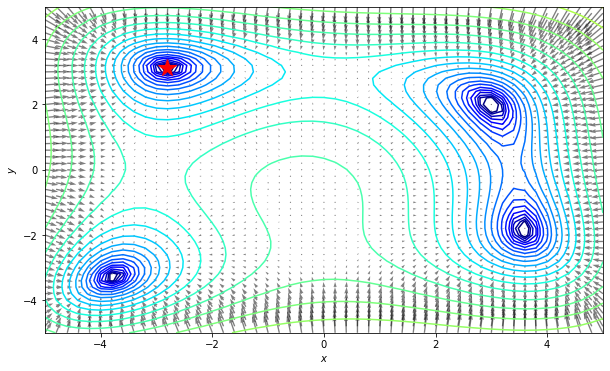

In [86]:
# 2D Contour Plot and Gradient Vector Field
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

## 3. Bukin Function
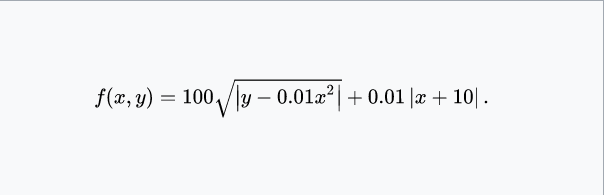

In [87]:
# Bukin Function
f = lambda x, y: 100 * np.sqrt(abs(y - 0.01*x**2)) + 0.01 * abs(x + 10)

In [88]:
xmin, xmax, xstep = -15, -5, .2
ymin, ymax, ystep = -3, 3, .2

In [89]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [90]:
z = f(x, y)

In [91]:
minima = np.array([-10, 1])

In [92]:
f(*minima)

0.0

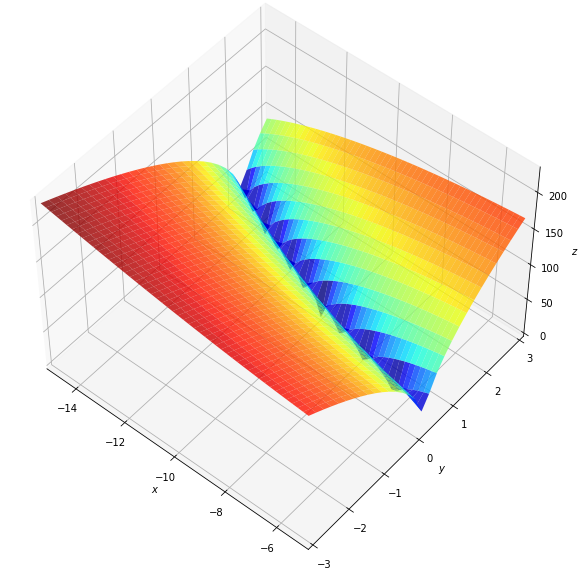

In [94]:
# 3D Surface Plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()